# Analysis of Medical data based on the research question: Which Patients are at Highest Risk of ReAdmission using a Linear Regression Model.

In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



#Load dataset
medical_df = pd.read_csv("medical_clean.csv")
medical_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [37]:
#check for duplicate values
medical_df.duplicated().sum()

0

In [38]:
#Feature Engineering
#Create Age band Feature from age
#create age bins and labels
bins = [0,17,24,34,44,54,64,100]
labels = ['under 18','18-24','25-34','35-44','45-54','55-64','65 or over']

#create age band column
medical_df['Age band'] = pd.cut(medical_df['Age'], bins = bins, labels= labels, right=False)

medical_df['Age band'].unique()

['45-54', '65 or over', '18-24', '35-44', '55-64', '25-34']
Categories (7, object): ['under 18' < '18-24' < '25-34' < '35-44' < '45-54' < '55-64' < '65 or over']

In [39]:
#Key variables chosen to answer research quesstion
data = medical_df[['Population','Area','Age','Income','Marital','Gender','ReAdmis','VitD_levels','Doc_visits','Full_meals_eaten', 'vitD_supp','Initial_admin','HighBlood','Stroke','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Reflux_esophagitis','Asthma','Services','Initial_days','Age band']]

numerical_F = data[['Population','Age','Income','VitD_levels','Doc_visits','Full_meals_eaten','vitD_supp','Initial_days']]

categorical_F = data[['Area','Marital','Gender','ReAdmis','Initial_admin','HighBlood','Stroke','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Reflux_esophagitis','Asthma','Services','Age band']]




In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Population          10000 non-null  int64   
 1   Area                10000 non-null  object  
 2   Age                 10000 non-null  int64   
 3   Income              10000 non-null  float64 
 4   Marital             10000 non-null  object  
 5   Gender              10000 non-null  object  
 6   ReAdmis             10000 non-null  object  
 7   VitD_levels         10000 non-null  float64 
 8   Doc_visits          10000 non-null  int64   
 9   Full_meals_eaten    10000 non-null  int64   
 10  vitD_supp           10000 non-null  int64   
 11  Initial_admin       10000 non-null  object  
 12  HighBlood           10000 non-null  object  
 13  Stroke              10000 non-null  object  
 14  Overweight          10000 non-null  object  
 15  Arthritis           10000 non-null  o

In [41]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,10000.0,9965.253800,14824.758614,0.000000,694.750000,2769.000000,13945.000000,122814.000000
Age,10000.0,53.511700,20.638538,18.000000,36.000000,53.000000,71.000000,89.000000
Income,10000.0,40490.495160,28521.153293,154.080000,19598.775000,33768.420000,54296.402500,207249.100000
VitD_levels,10000.0,17.964262,2.017231,9.806483,16.626439,17.951122,19.347963,26.394449
Doc_visits,10000.0,5.012200,1.045734,1.000000,4.000000,5.000000,6.000000,9.000000
Full_meals_eaten,10000.0,1.001400,1.008117,0.000000,0.000000,1.000000,2.000000,7.000000
vitD_supp,10000.0,0.398900,0.628505,0.000000,0.000000,0.000000,1.000000,5.000000
Initial_days,10000.0,34.455299,26.309341,1.001981,7.896215,35.836244,61.161020,71.981490


In [42]:
data.shape

(10000, 25)

In [43]:
data.isna().sum()

Population            0
Area                  0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Initial_admin         0
HighBlood             0
Stroke                0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
Age band              0
dtype: int64

In [44]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,10000.0,9965.253800,14824.758614,0.000000,694.750000,2769.000000,13945.000000,122814.000000
Age,10000.0,53.511700,20.638538,18.000000,36.000000,53.000000,71.000000,89.000000
Income,10000.0,40490.495160,28521.153293,154.080000,19598.775000,33768.420000,54296.402500,207249.100000
VitD_levels,10000.0,17.964262,2.017231,9.806483,16.626439,17.951122,19.347963,26.394449
Doc_visits,10000.0,5.012200,1.045734,1.000000,4.000000,5.000000,6.000000,9.000000
Full_meals_eaten,10000.0,1.001400,1.008117,0.000000,0.000000,1.000000,2.000000,7.000000
vitD_supp,10000.0,0.398900,0.628505,0.000000,0.000000,0.000000,1.000000,5.000000
Initial_days,10000.0,34.455299,26.309341,1.001981,7.896215,35.836244,61.161020,71.981490


In [45]:
#check unique values in each column
for column in data.columns:
    print(f"{column} : {data[column].unique()}")

Population : [ 2951 11303 17125 ...  8368  7908 41524]
Area : ['Suburban' 'Urban' 'Rural']
Age : [53 51 78 22 76 50 40 48 55 64 41 45 85 57 44 54 72 84 86 52 31 37 19 75
 70 69 56 32 27 65 25 79 24 89 58 60 33 83 66 73 35 43 63 36 39 29 20 34
 47 18 59 82 26 74 38 28 77 30 87 23 80 71 68 67 88 62 49 21 61 81 42 46]
Income : [86575.93 46805.99 14370.14 ... 65917.81 29702.32 62682.63]
Marital : ['Divorced' 'Married' 'Widowed' 'Never Married' 'Separated']
Gender : ['Male' 'Female' 'Nonbinary']
ReAdmis : ['No' 'Yes']
VitD_levels : [19.1414657  18.9403523  18.05750734 ... 17.12907    19.91043
 18.38862   ]
Doc_visits : [6 4 5 7 3 2 8 9 1]
Full_meals_eaten : [0 2 1 3 4 5 7 6]
vitD_supp : [0 1 2 3 4 5]
Initial_admin : ['Emergency Admission' 'Elective Admission' 'Observation Admission']
HighBlood : ['Yes' 'No']
Stroke : ['No' 'Yes']
Overweight : ['No' 'Yes']
Arthritis : ['Yes' 'No']
Diabetes : ['Yes' 'No']
Hyperlipidemia : ['No' 'Yes']
BackPain : ['Yes' 'No']
Anxiety : ['Yes' 'No']
Reflux_esop

## Exploratory Data Analysis

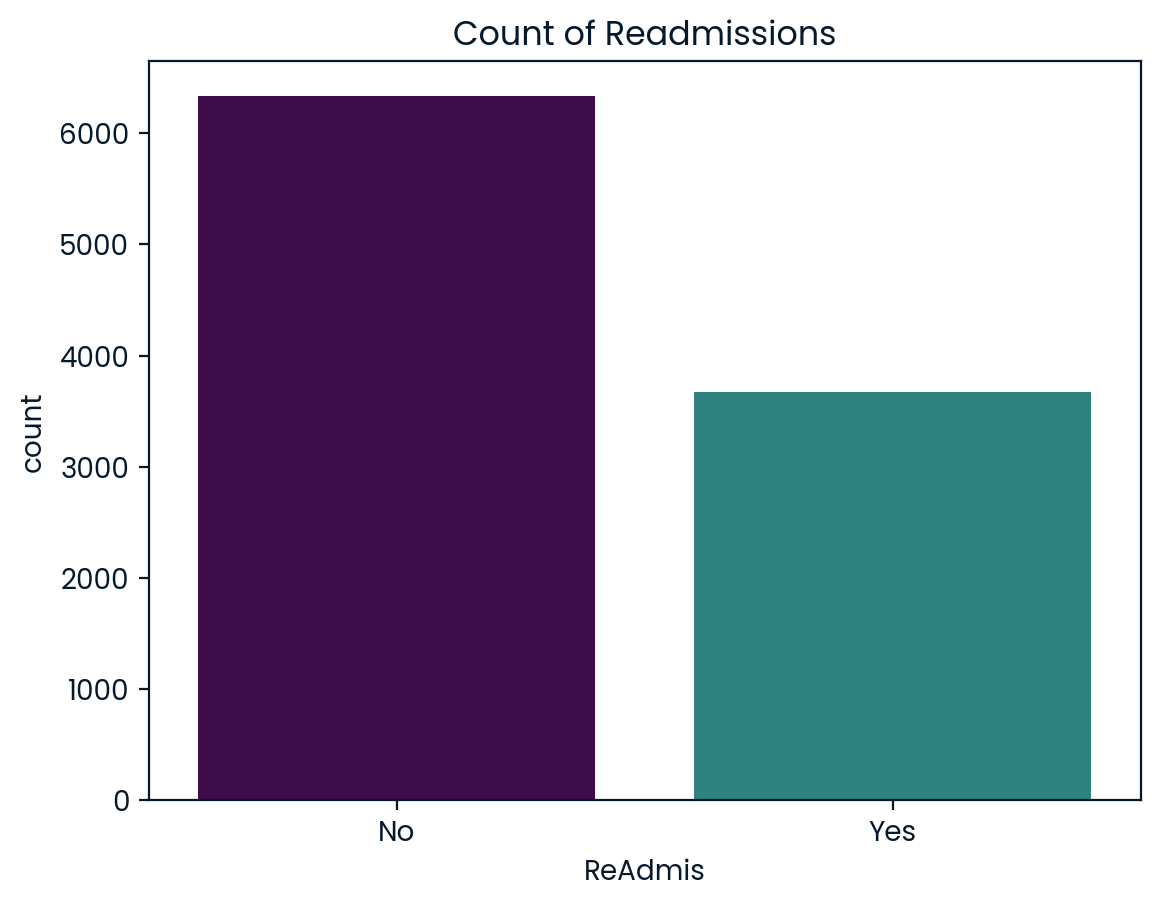

In [46]:
# visualization of the count of readmits

# colors from matplotlib
colors = plt.cm.viridis(np.linspace(0, 1, 3))
sns.countplot(data=data, x='ReAdmis', palette=colors)
plt.title("Count of Readmissions")
plt.show()

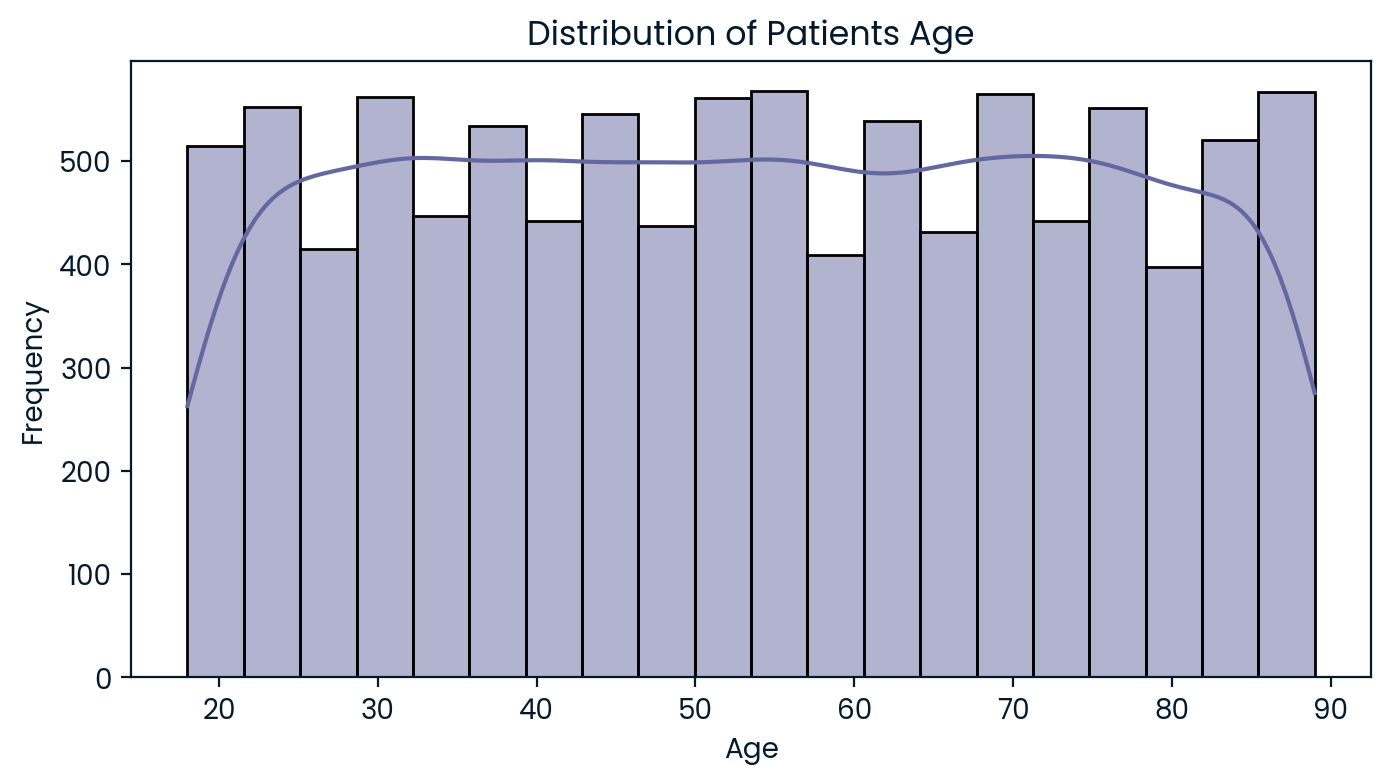

In [47]:
plt.figure(figsize=(8, 4))
sns.histplot(data['Age'], bins=20, kde=True,palette=colors)
plt.title('Distribution of Patients Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

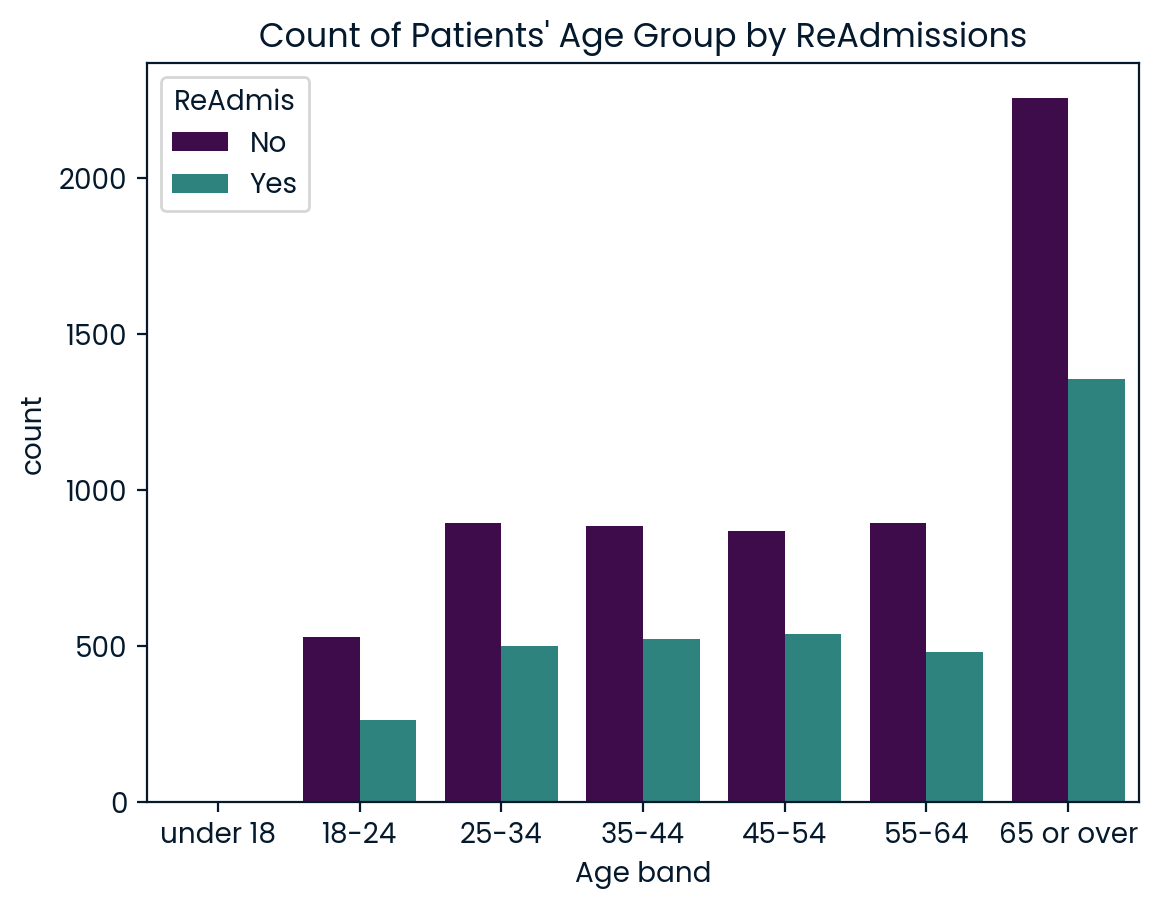

In [48]:


sns.countplot(data=data, x='Age band',hue='ReAdmis',palette=colors)
plt.title("Count of Patients' Age Group by ReAdmissions")
plt.show()

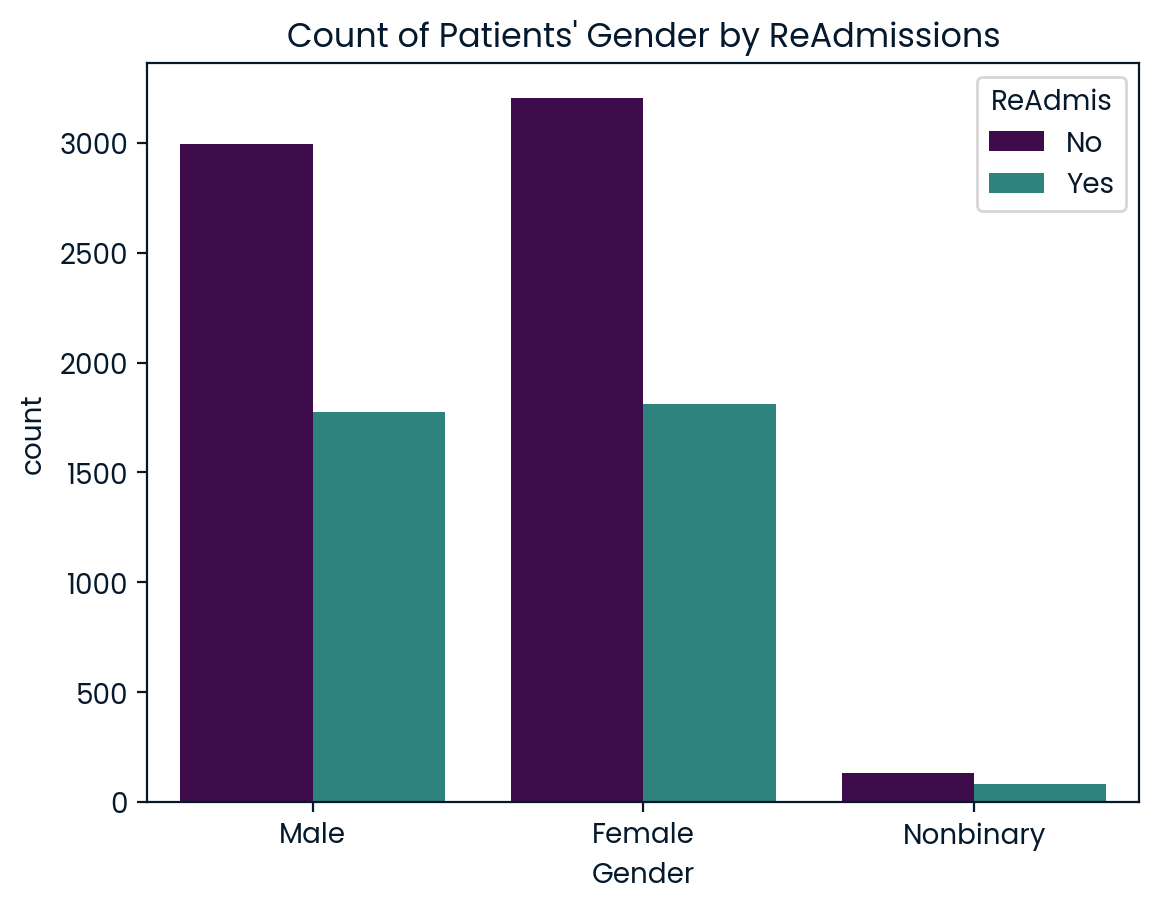

In [49]:
#Gender by ReAdmits
sns.countplot(data=data, x='Gender',hue='ReAdmis',palette=colors)
plt.title("Count of Patients' Gender by ReAdmissions")
plt.show()

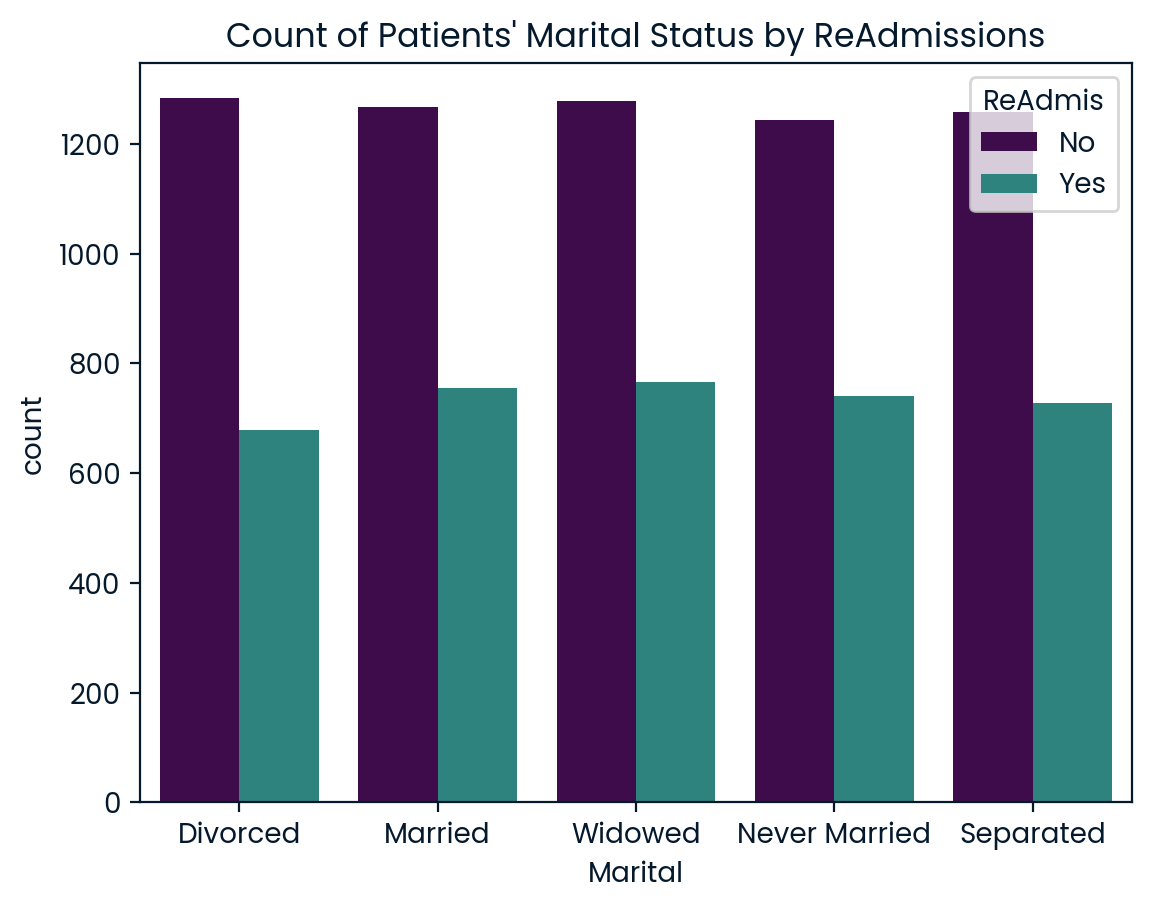

In [50]:
#Marital Status by ReAdmits
sns.countplot(data=data, x='Marital',hue='ReAdmis',palette=colors)
plt.title("Count of Patients' Marital Status by ReAdmissions")
plt.show()

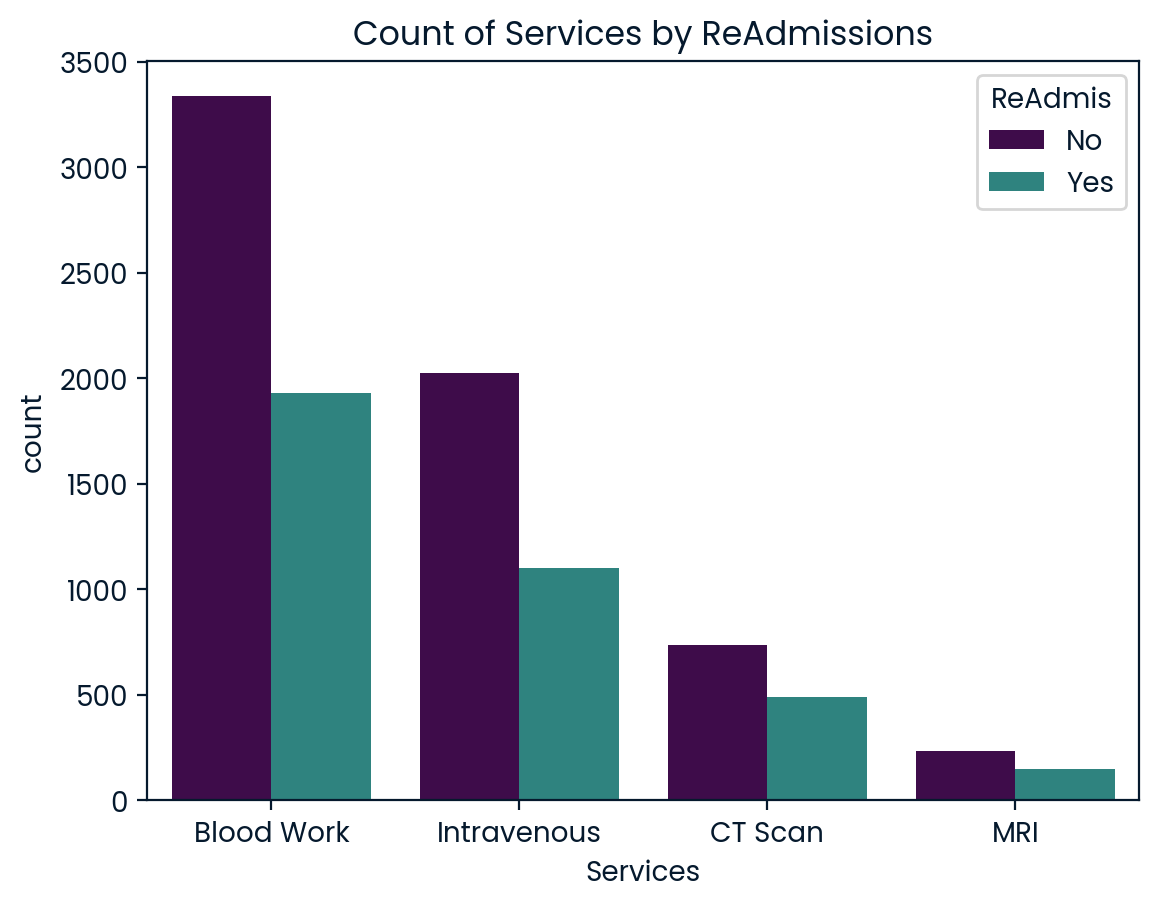

In [51]:
#Service by ReAdmits
sns.countplot(data=data, x='Services',hue='ReAdmis',palette=colors)
plt.title("Count of Services by ReAdmissions")
plt.show()

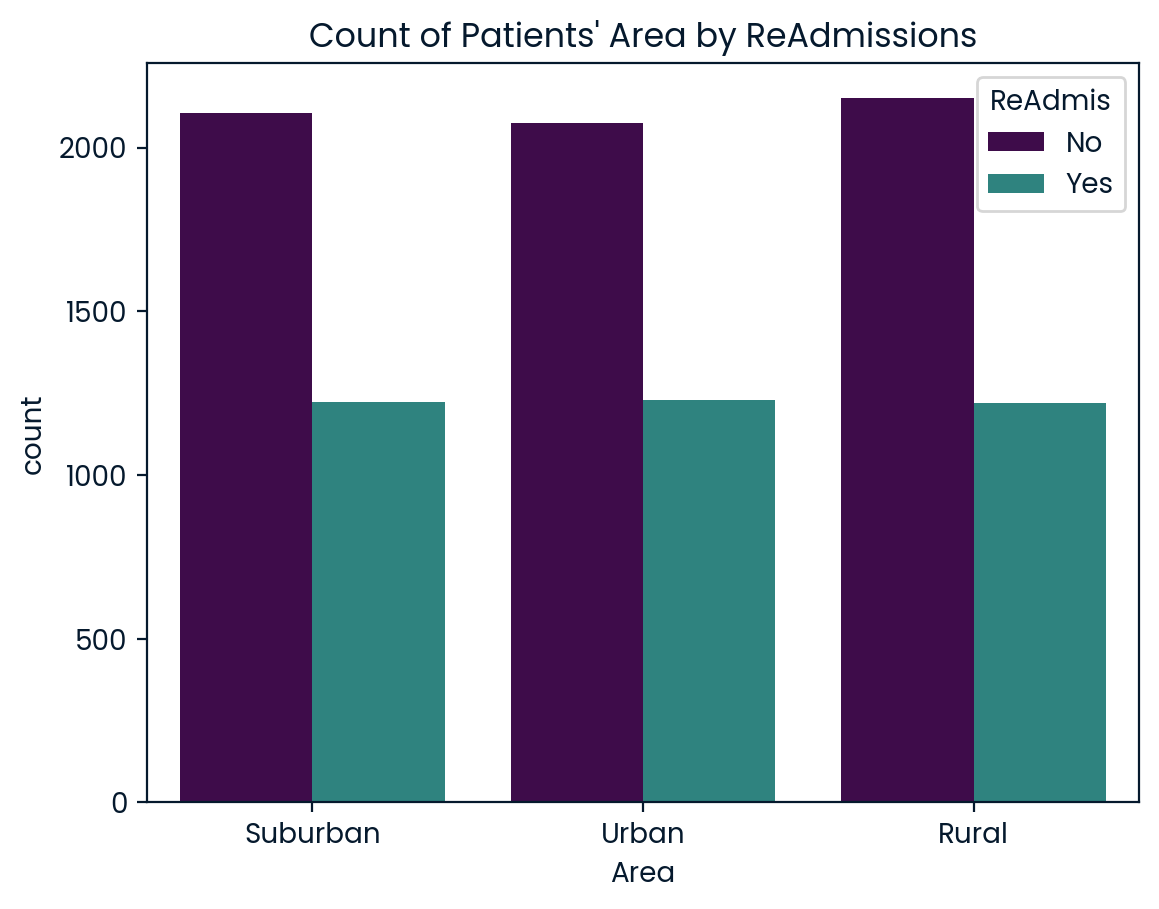

In [52]:
#Area by ReAdmits
sns.countplot(data=data, x='Area',hue='ReAdmis',palette=colors)
plt.title("Count of Patients' Area by ReAdmissions")
plt.show()

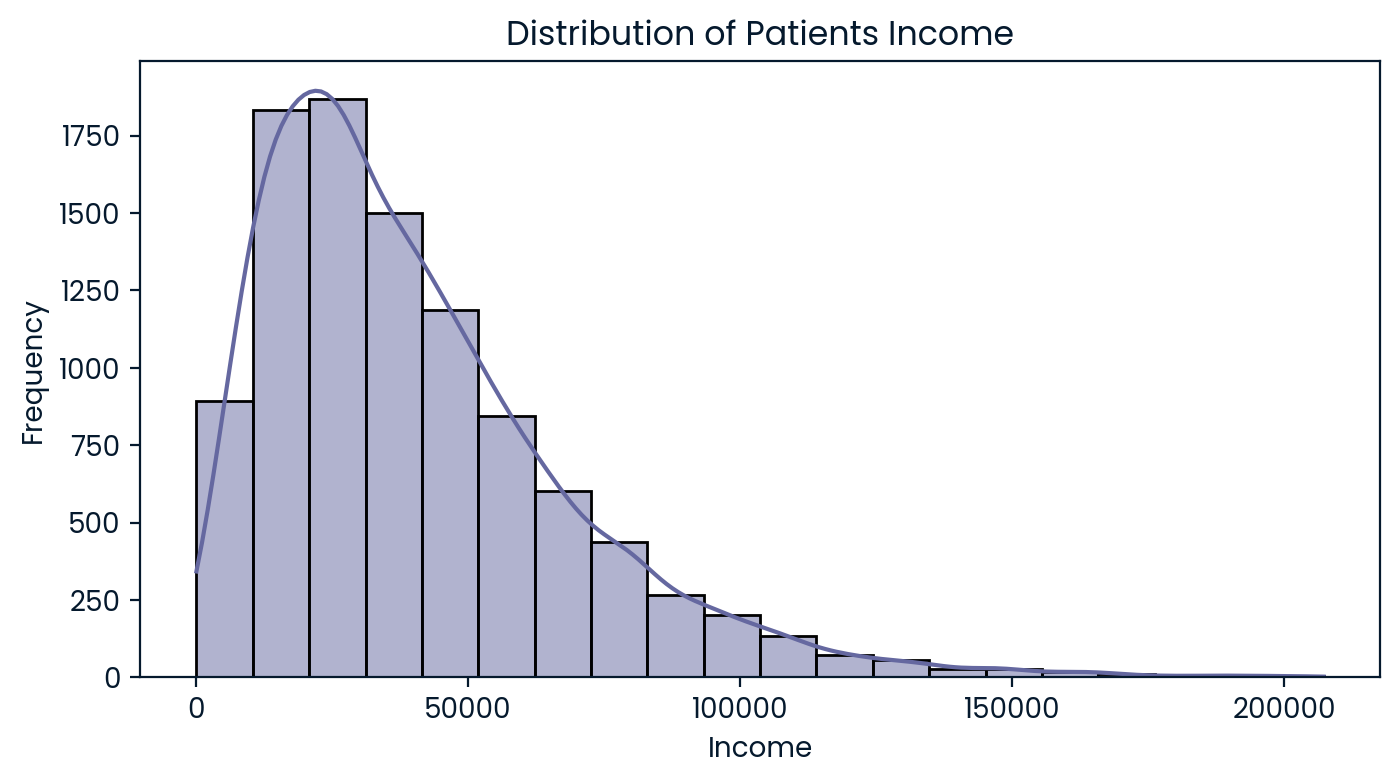

In [53]:
plt.figure(figsize=(8, 4))
sns.histplot(data['Income'], bins=20, kde=True,palette=colors)
plt.title('Distribution of Patients Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

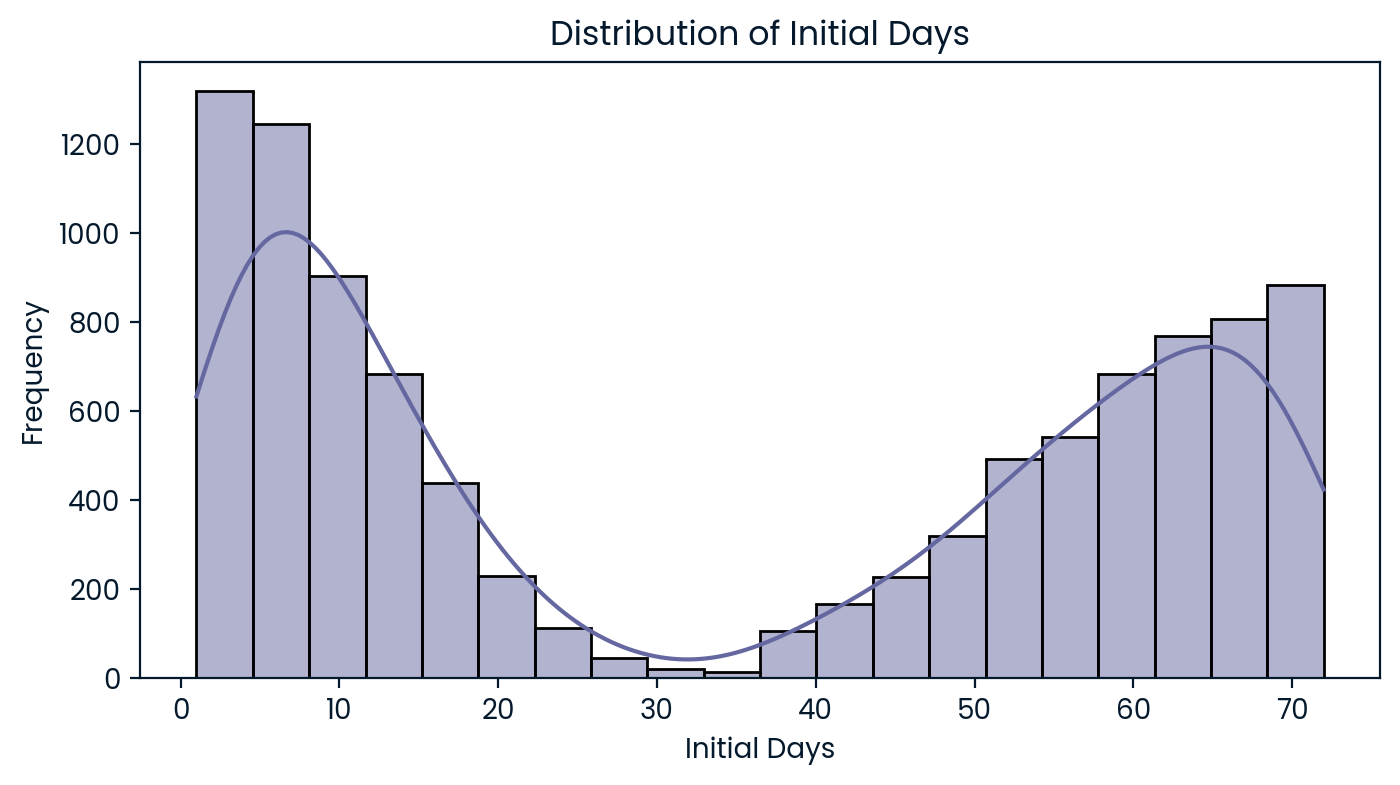

In [54]:
plt.figure(figsize=(8, 4))
sns.histplot(data['Initial_days'], bins=20, kde=True,palette=colors)
plt.title('Distribution of Initial Days')
plt.xlabel('Initial Days')
plt.ylabel('Frequency')
plt.show()

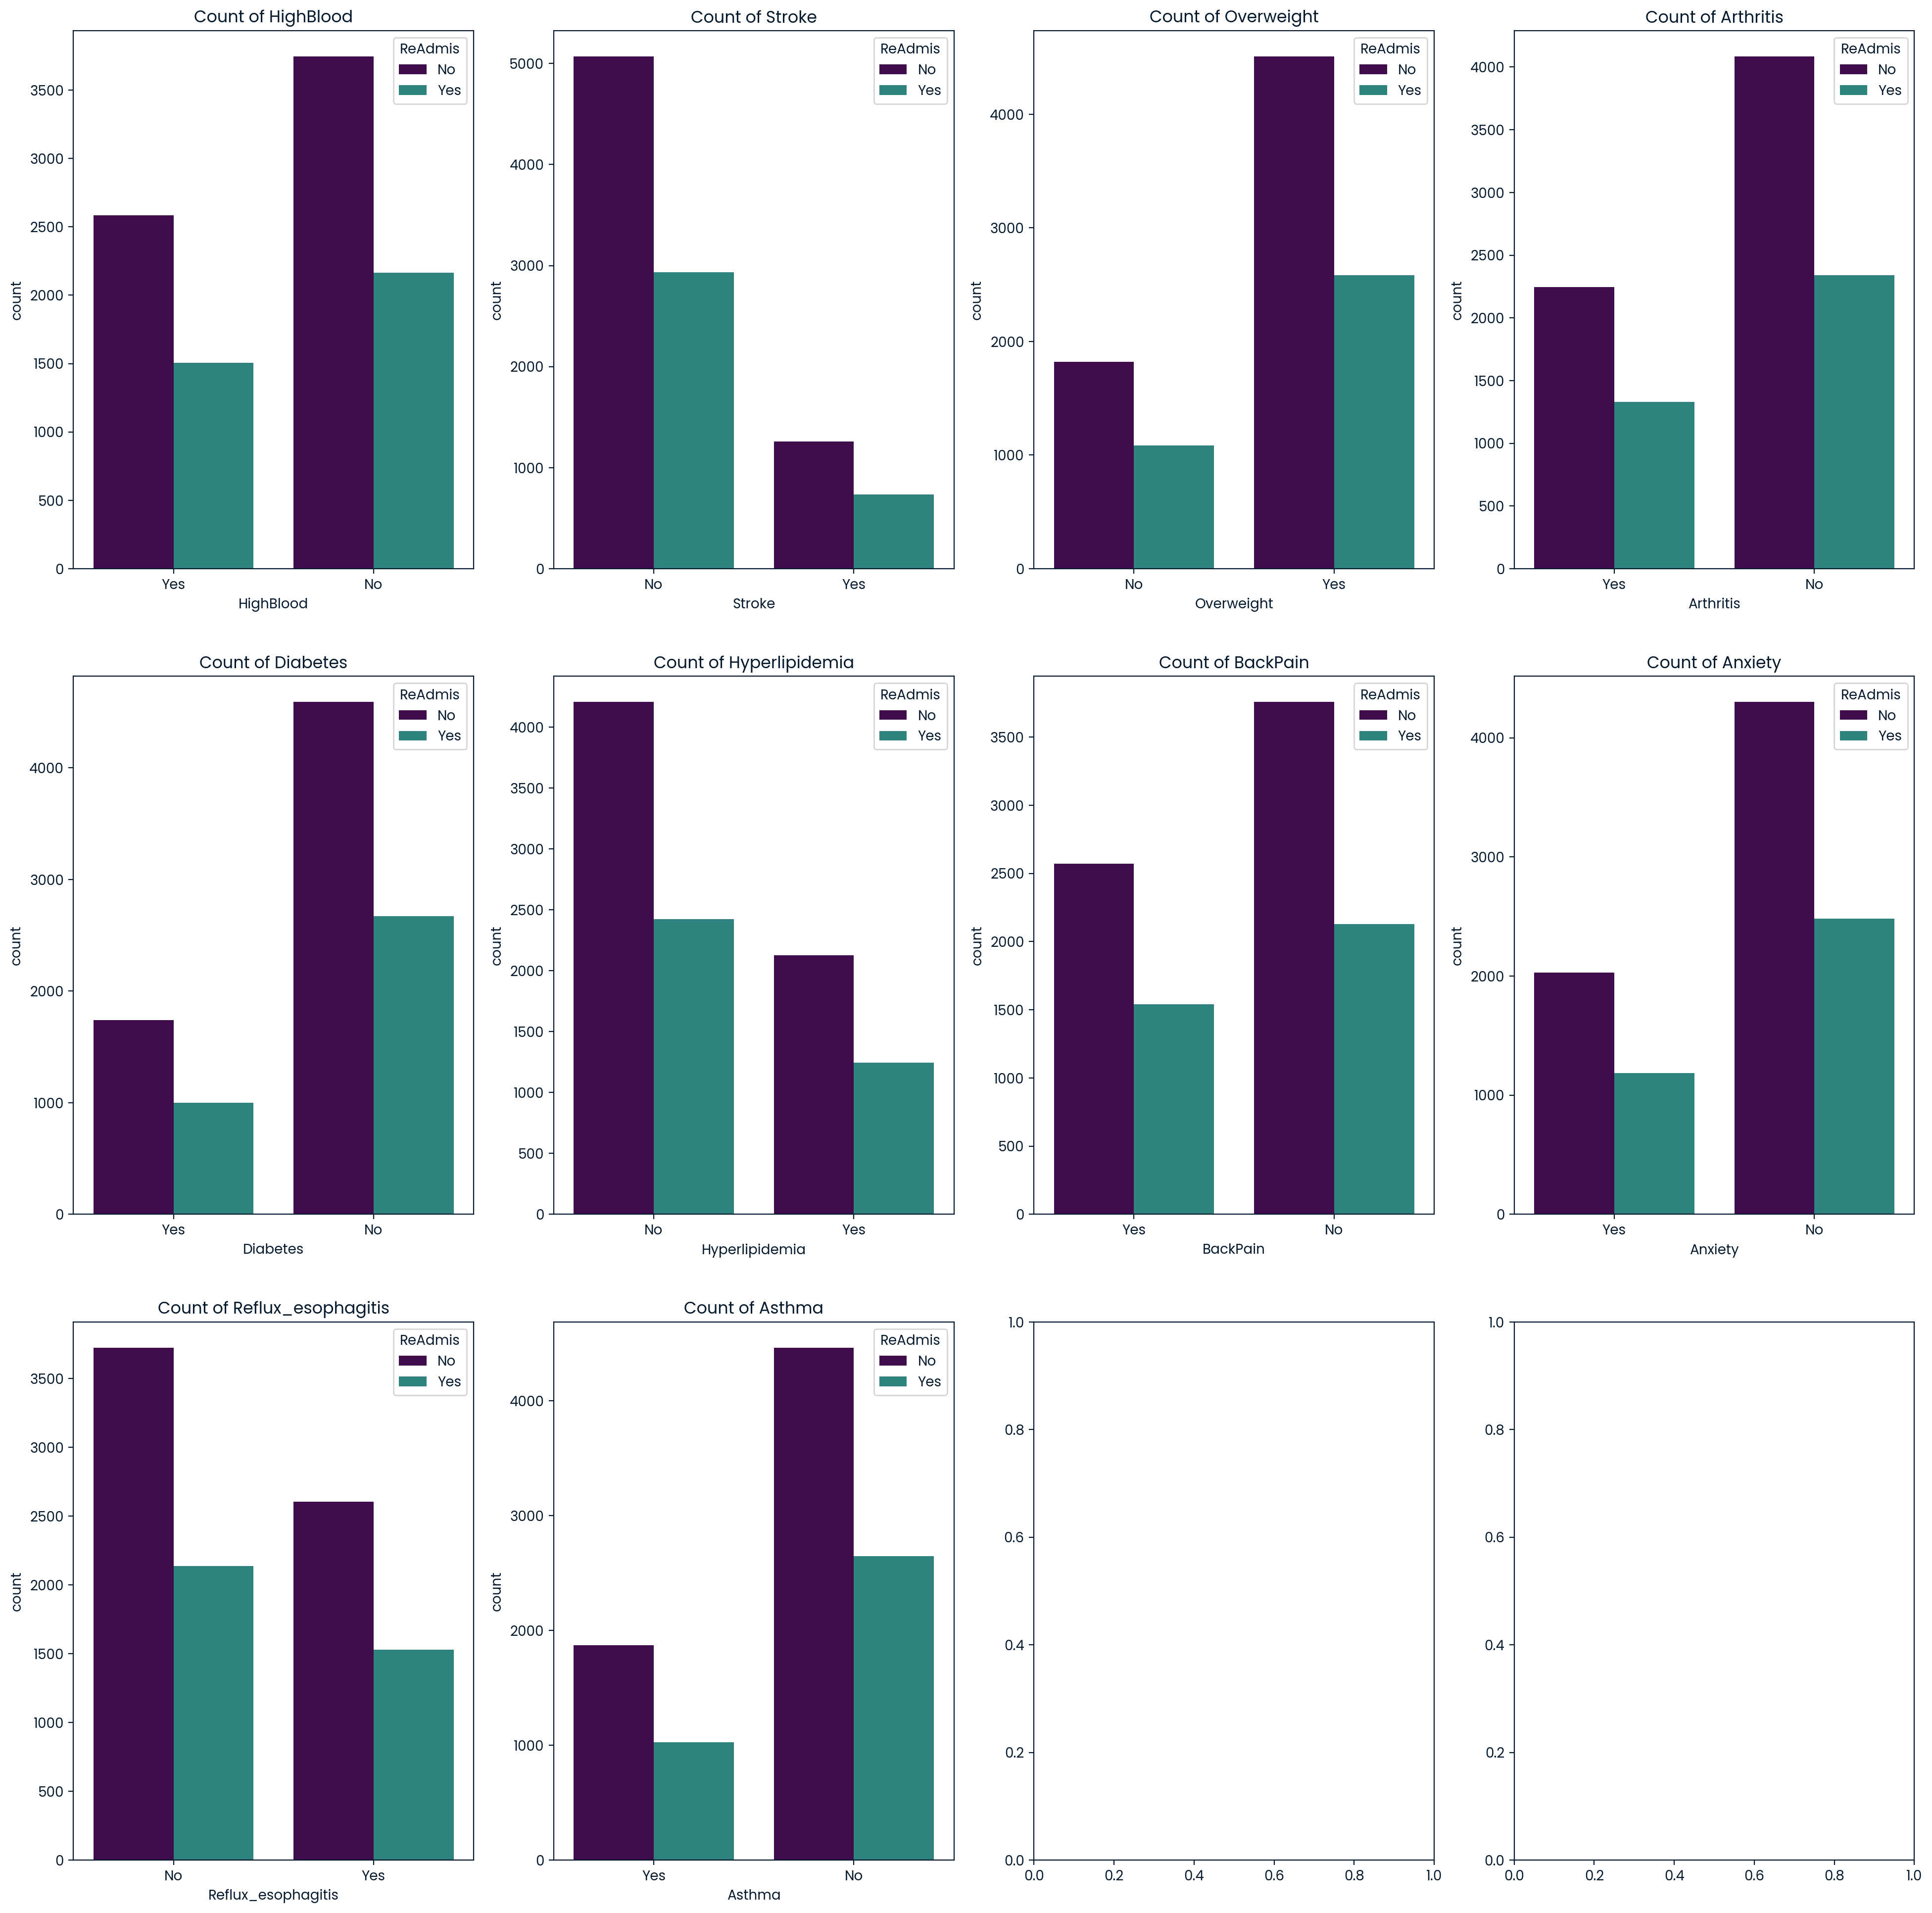

In [55]:
#Visualization of Illnesses with ReAdmiss

#list of illnesses
illnesses =['HighBlood','Stroke','Overweight','Arthritis','Diabetes',
            'Hyperlipidemia','BackPain','Anxiety','Reflux_esophagitis','Asthma']

fig, ax = plt.subplots(ncols=4, nrows=3)
fig.set_figheight(24)
fig.set_figwidth(24)
for i, group in enumerate(illnesses):
    sns.countplot(data=data, x=group, hue='ReAdmis', hue_order=['No','Yes'], ax=ax[int(i/4), int(i%4)],palette=colors)
    ax[int(i/4), int(i%4)].set_title(f'Count of {group}')
plt.show()

## Data Preprocessing

In [56]:
categorical_F = data[['Area','Marital','Gender','ReAdmis','Initial_admin','HighBlood','Stroke','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Reflux_esophagitis','Asthma','Services','Age band']]


# Categorical variable encoding

cat_F = ['Area','Marital','Gender','ReAdmis','Initial_admin','HighBlood','Stroke','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Reflux_esophagitis','Asthma','Services','Age band']

for i in cat_F:
    # convert to categorical data type
    data[i] = data[i].astype('category')
    # encode
    data[i] = data[i].cat.codes
data.head()

,Population,Area,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_admin,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Reflux_esophagitis,Asthma,Services,Initial_days,Age band
0,2951,1,53,86575.93,0,1,0,19.141466,6,0,0,1,1,0,0,1,1,0,1,1,0,1,0,10.585770,4
1,11303,2,51,46805.99,1,0,0,18.940352,4,2,1,1,1,0,1,0,0,0,0,0,1,0,2,15.129562,4
2,17125,1,53,14370.14,4,0,0,18.057507,4,1,0,0,1,0,1,0,1,0,0,0,0,0,0,4.772177,4
3,2162,1,78,39741.49,1,1,0,16.576858,4,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1.714879,6
4,5287,0,22,1209.56,4,0,0,17.439069,5,0,2,0,0,0,0,0,0,1,0,0,0,0,1,1.254807,1


# Linear Regression Using All Features

In [57]:
#Defining features and target variables
x = data.drop('ReAdmis',axis=1)
y = data['ReAdmis']

P-Values Interpretation:

Low P-Value (< 0.05): Suggests that there is a statistically significant relationship between the feature and the target variable. You can generally consider these features as important.

High P-Value (> 0.05): Suggests that the feature may not have a significant impact on the target variable. These features might be less important or redundant.

In [58]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X_columns = ['Intercept', 'Population','Area','Age','Income','Marital','Gender','VitD_levels','Doc_visits','Full_meals_eaten','vitD_supp','Initial_admin','HighBlood','Stroke','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Reflux_esophagitis','Asthma','Services','Initial_days','Age band']

# Function for creating Linear Regression model using Statsmodel
def reg_Model(x, y, columns):
    constant = sm.add_constant(x)
    # Renaming constants
    constant.columns = ['const'] + columns[1:]
    model = sm.OLS(y, constant).fit()
    print(model.summary())
    
# Function to evaluate model performance
def eval_model(x, y):
    constant = sm.add_constant(x)
    model = sm.OLS(y, constant).fit()
    y_pred = model.predict(constant)
    resids = y - y_pred
    
    
    # Calculating the Mean Squared Error (MSE)
    mse = np.mean(resids**2)
    
    # Calculating the RMSE
    rmse = np.sqrt(mse)
    
    print(f'RMSE: {rmse}')
    
    
def model_coeff(x, y):
    constant = sm.add_constant(x)
    model = sm.OLS(y, constant).fit()
    y_pred = model.predict(constant)
    model_coefficient = model.params
    print(f'model coefficients: {model_coefficient }')
    
# Function for Residual plot
def resid_plot(x, y):
    constant = sm.add_constant(x)
    model = sm.OLS(y, constant).fit()
    # Predict values with model
    y_pred = model.predict(constant)
    # Calculate residuals
    resids = y - y_pred
    
    # Residual Plot
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=y_pred, y=resids, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residual Values')
    plt.title('Residual Plot')
    plt.show()
    
# Function for Predicted vs Actual Values plot
def pred_Actual_plot(x, y):
    constant = sm.add_constant(x)
    model = sm.OLS(y, constant).fit()
    # Predict values with model
    y_pred = model.predict(constant)
    # Predicted Versus Actual Values Plot
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=y, y=y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted Values vs Actual Values')
    plt.show()

# Example usage
reg_Model(x, y, X_columns)

                            OLS Regression Results                            
Dep. Variable:                ReAdmis   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1093.
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        05:20:17   Log-Likelihood:                -445.31
No. Observations:               10000   AIC:                             940.6
Df Residuals:                    9975   BIC:                             1121.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2174      0

In [59]:
eval_model(x,y)

RMSE: 0.2529894146618338


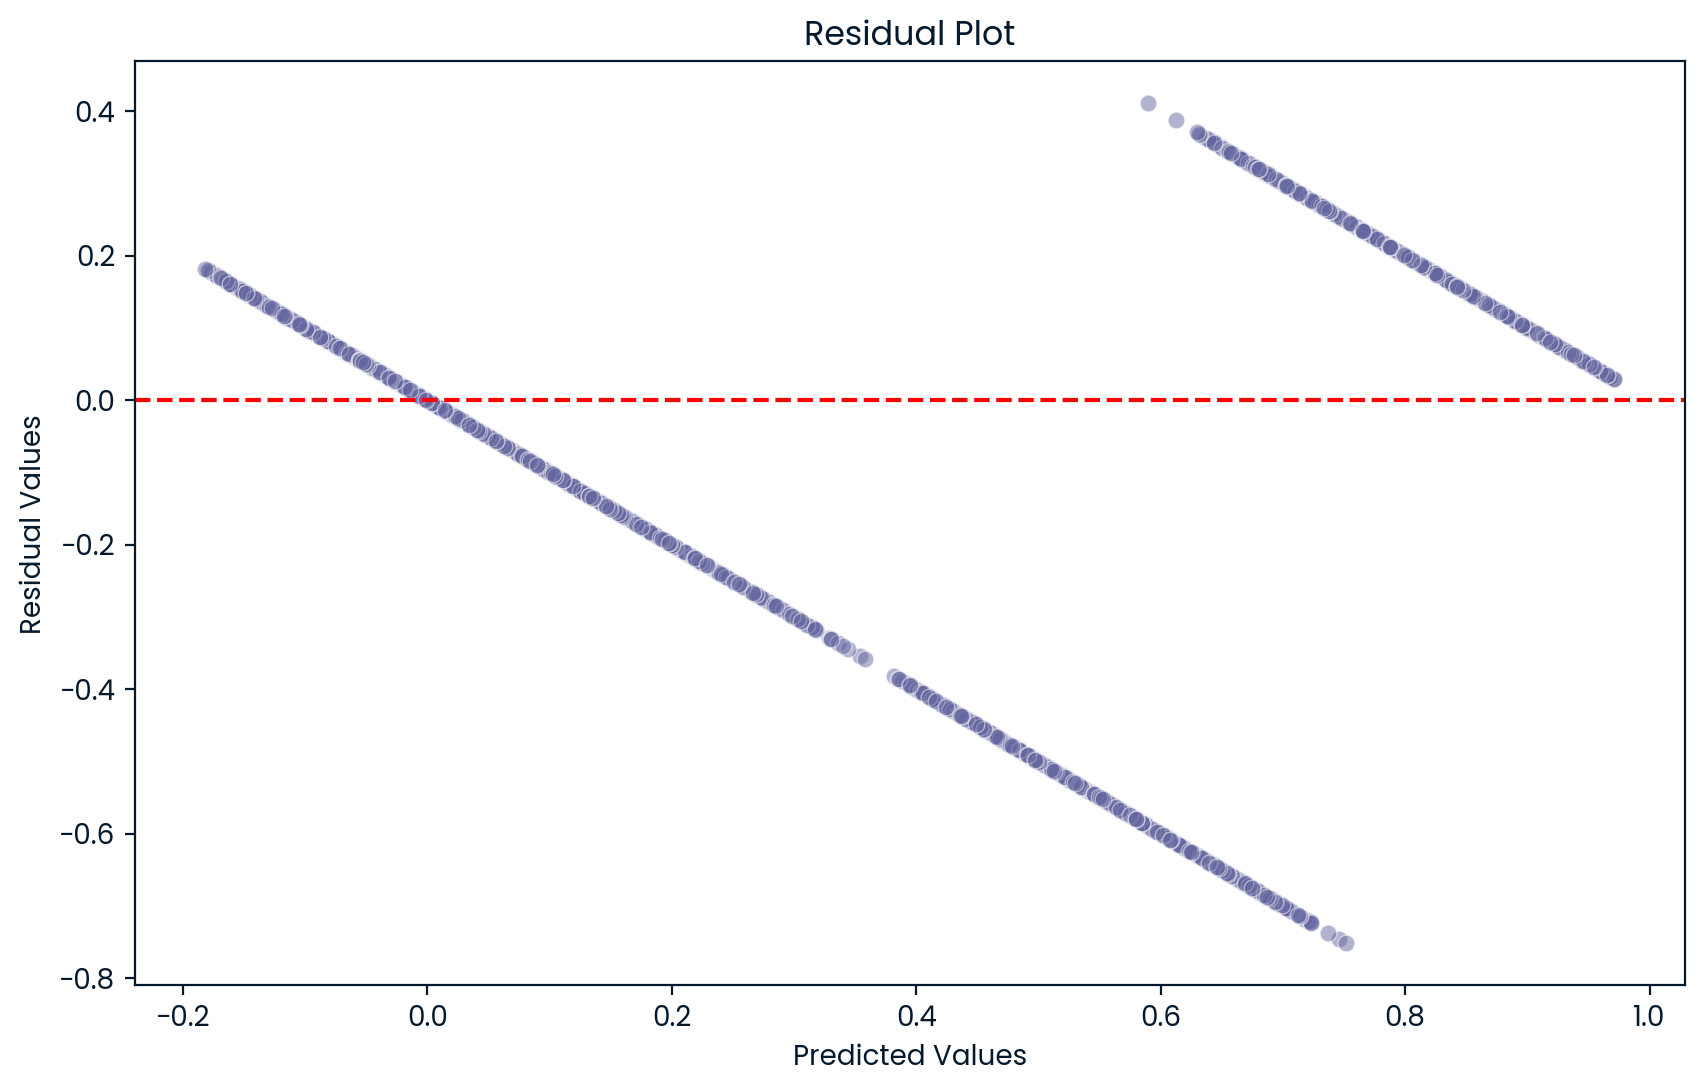

In [60]:
resid_plot(x,y)

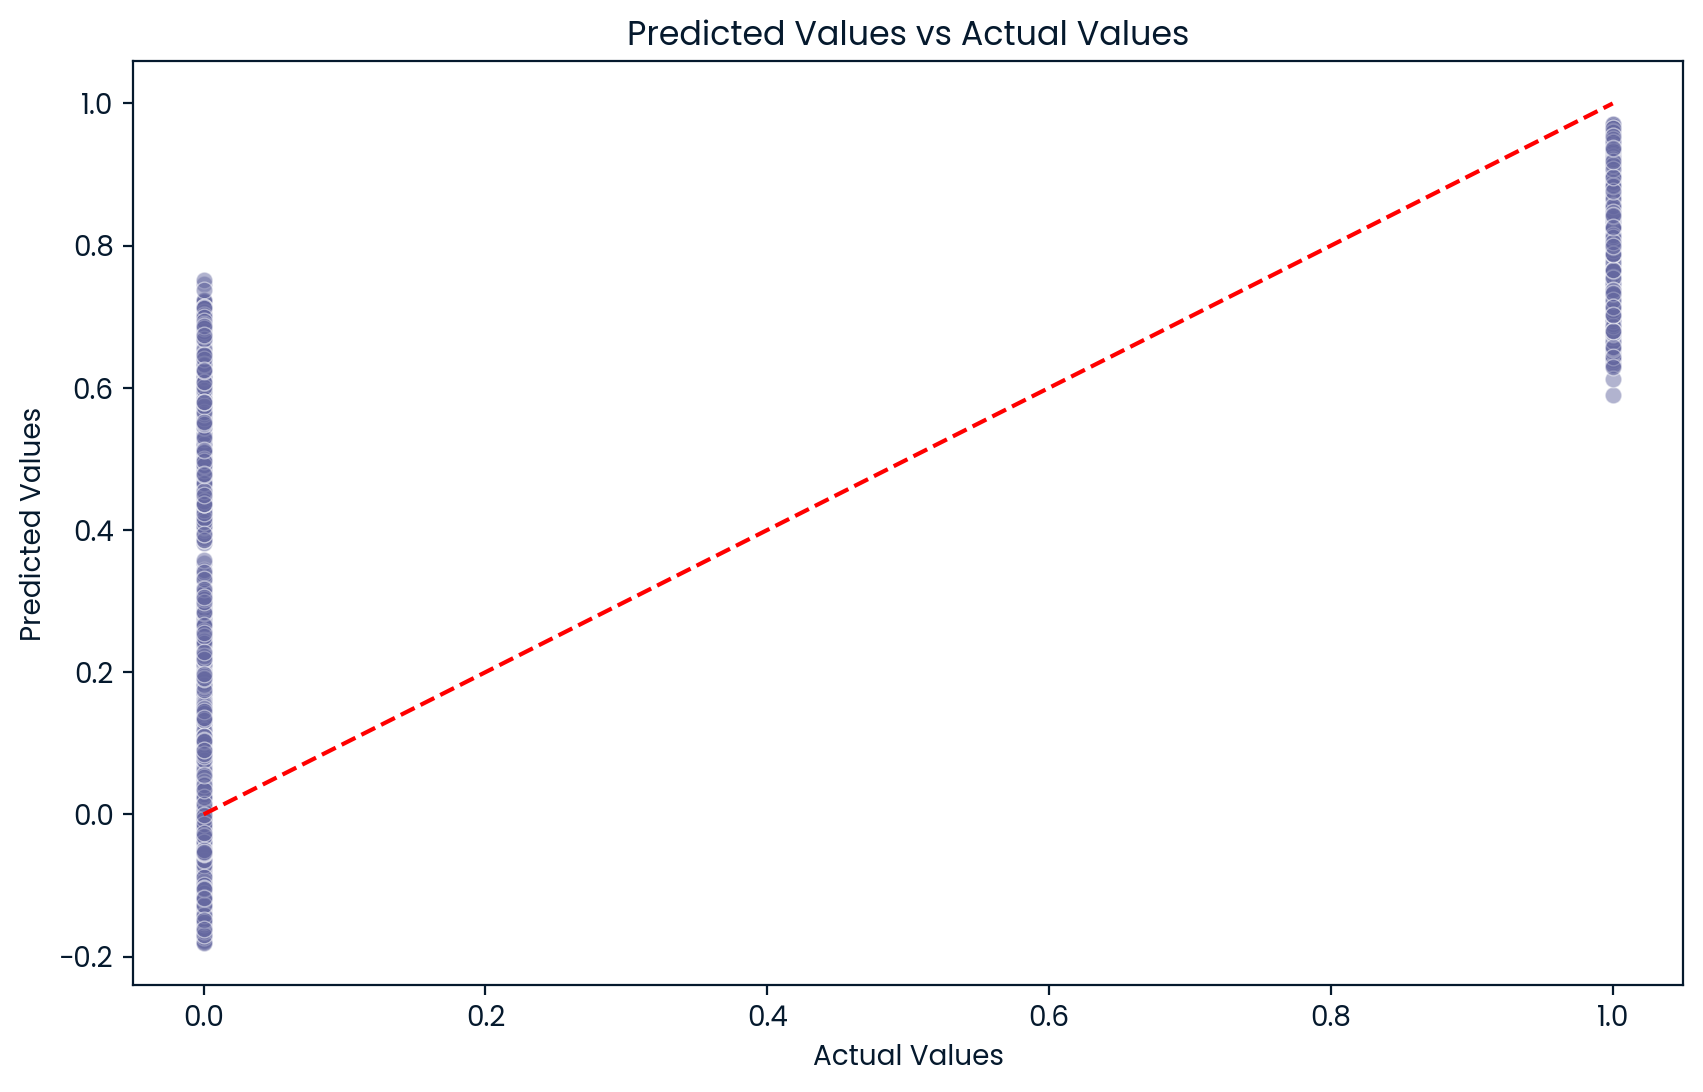

In [61]:
pred_Actual_plot(x,y)

# Correlation Analysis

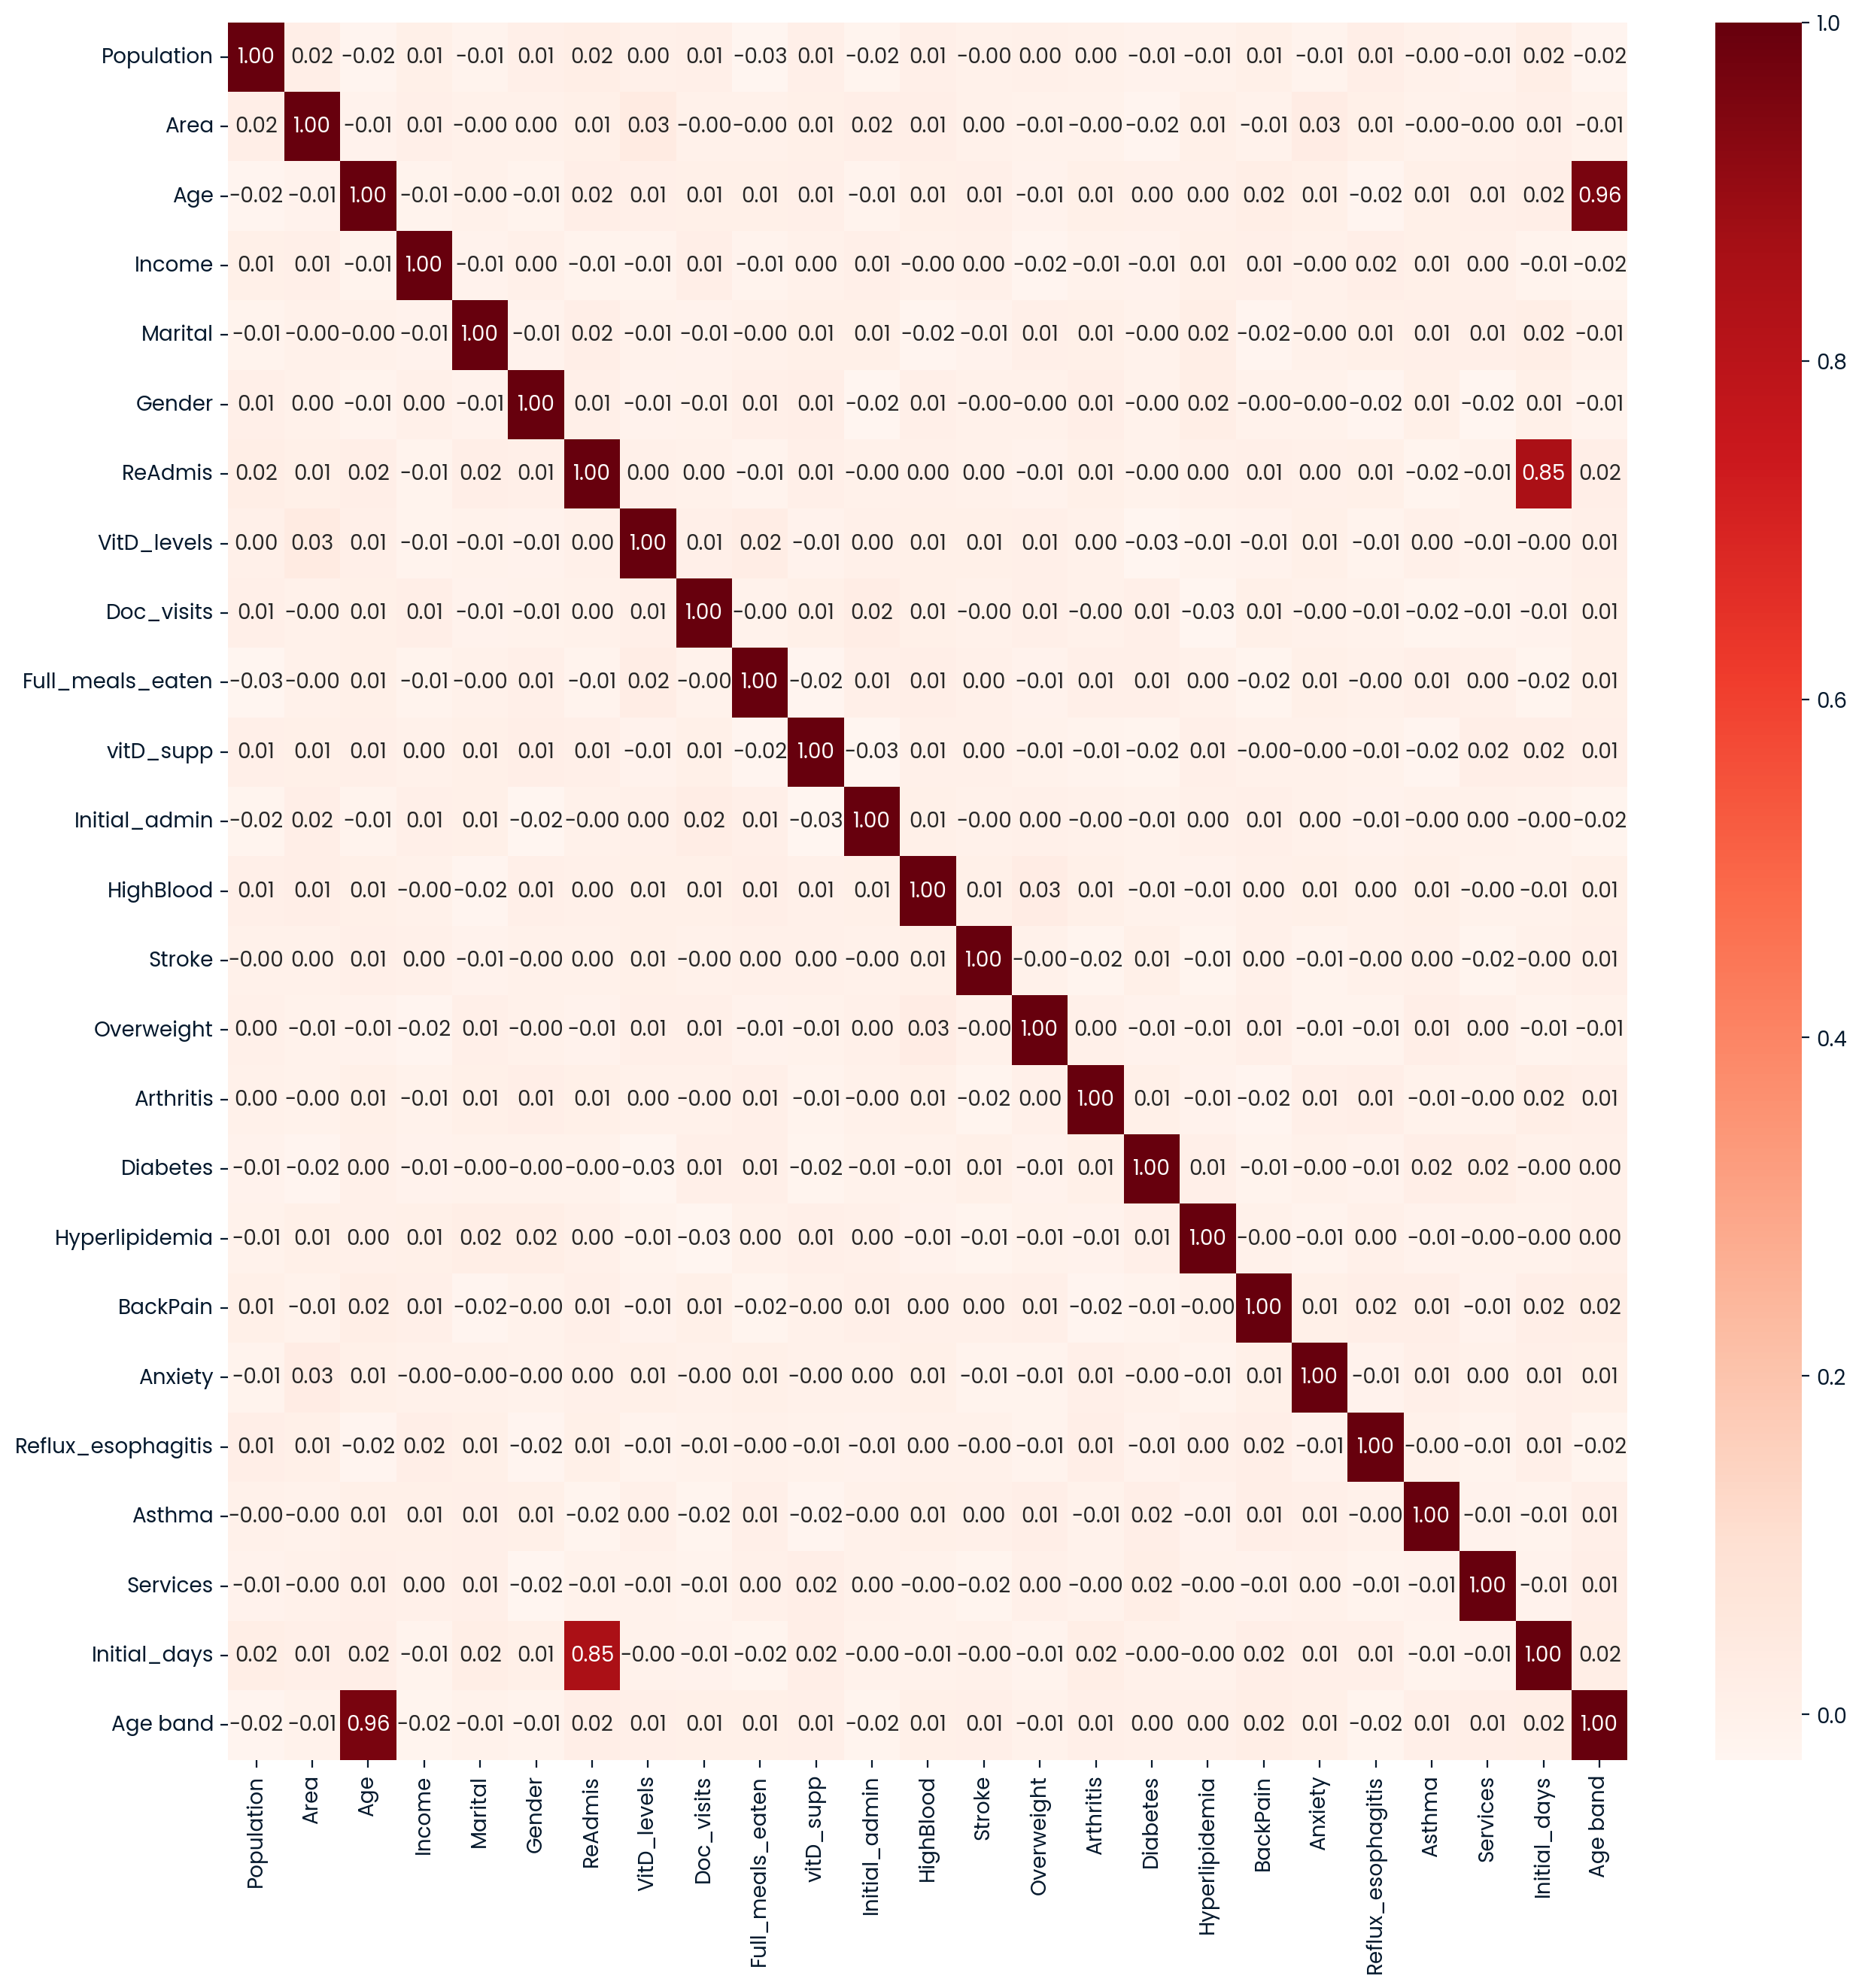

In [62]:
#Heat Map
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True,cmap='Reds', fmt='.2f')
plt.show()

In [63]:
#Check correlation between readmits and Features

correlations = data.corr()['ReAdmis'].abs()
print(f'Feature correlations with ReAdmis: {correlations}')

Feature correlations with ReAdmis: Population            0.020040
Area                  0.008438
Age                   0.015810
Income                0.011504
Marital               0.015036
Gender                0.012504
ReAdmis               1.000000
VitD_levels           0.004083
Doc_visits            0.000246
Full_meals_eaten      0.012172
vitD_supp             0.011039
Initial_admin         0.000605
HighBlood             0.002270
Stroke                0.000918
Overweight            0.008586
Arthritis             0.007663
Diabetes              0.003058
Hyperlipidemia        0.004307
BackPain              0.013313
Anxiety               0.002406
Reflux_esophagitis    0.005422
Asthma                0.017133
Services              0.005578
Initial_days          0.850862
Age band              0.016783
Name: ReAdmis, dtype: float64


Using an alpha value of 0.5 to compare p_values for selecting more significant features.
If p_value <= 0.5: Suggests that there is a significant relationships between target and feature variables.

If p_value >= 0.5: Suggests that the features do not show significant relationships with the target variable.

In [64]:
#Creating a reduced Linear Regression Model based on the statistical significance of the features to the target variable.

#Features with p_values less than o.5
features = ['Population','VitD_levels','Doc_visits','HighBlood','Arthritis','Hyperlipidemia','Anxiety','Reflux_esophagitis','Asthma','Initial_days']

x_columns = ['Intercept','Population','VitD_levels','Doc_visits','HighBlood','Arthritis','Hyperlipidemia','Anxiety','Reflux_esophagitis','Asthma','Initial_days']

x = data[features]

#function for creating reduced model
reg_Model(x,y,x_columns)


                            OLS Regression Results                            
Dep. Variable:                ReAdmis   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     2625.
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        05:20:20   Log-Likelihood:                -446.74
No. Observations:               10000   AIC:                             915.5
Df Residuals:                    9989   BIC:                             994.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2129      0

In [65]:
#RMSE
eval_model(x,y)

RMSE: 0.2530255244190532


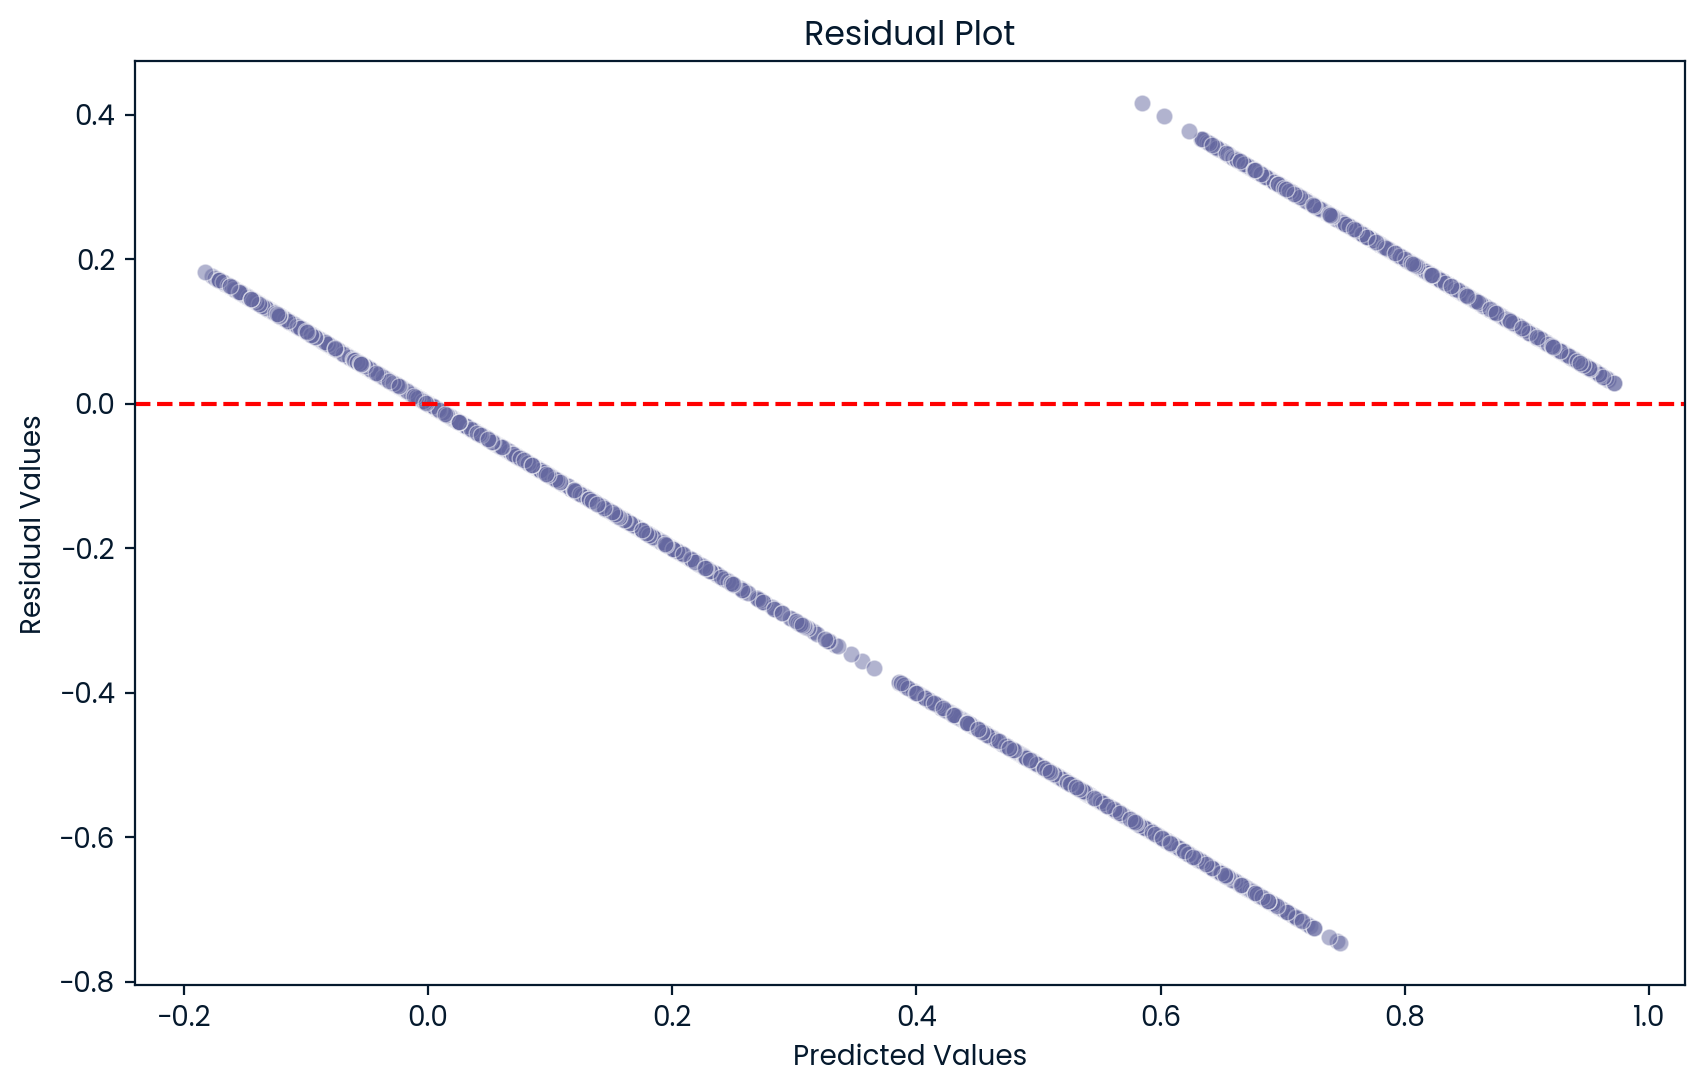

In [66]:
resid_plot(x,y)

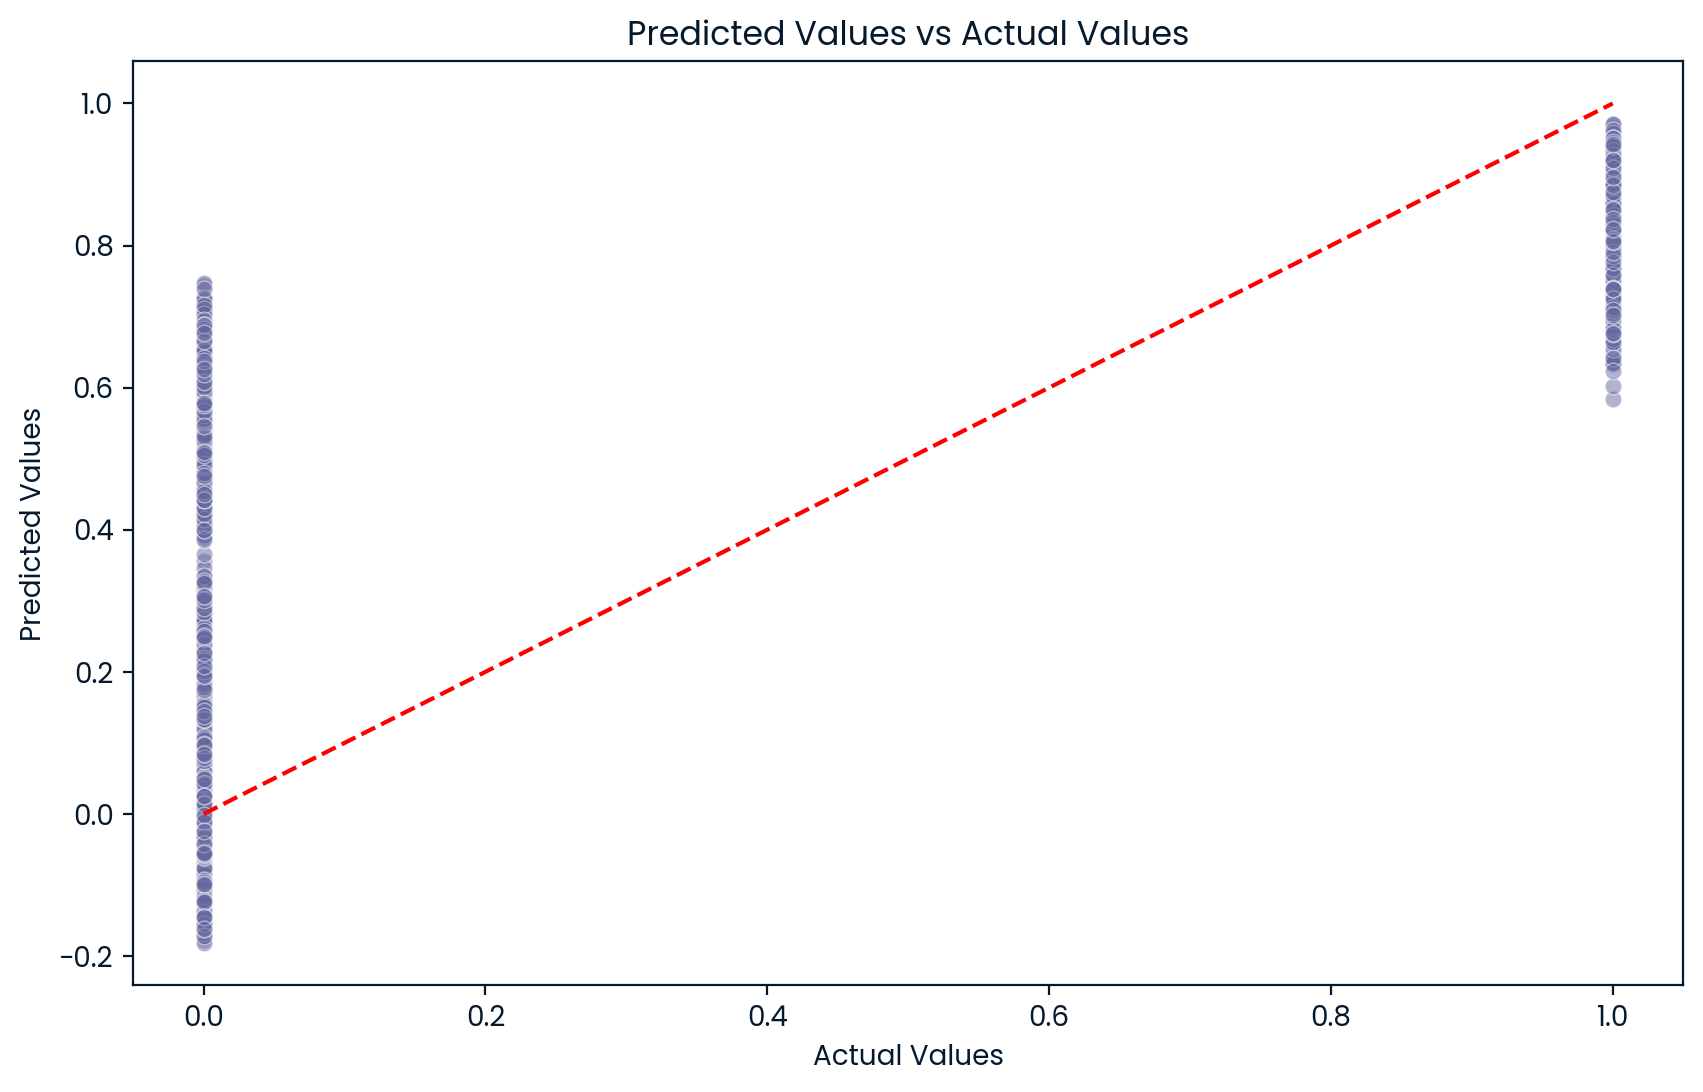

In [67]:
pred_Actual_plot(x,y)

In [68]:
#coefficients of the reduced model
model_coeff(x, y)

model coefficients: const                -2.129452e-01
Population            1.626491e-07
VitD_levels           1.714350e-03
Doc_visits            2.698131e-03
HighBlood             7.602930e-03
Arthritis            -8.346486e-03
Hyperlipidemia        7.987415e-03
Anxiety              -7.776810e-03
Reflux_esophagitis   -4.788818e-03
Asthma               -5.863806e-03
Initial_days          1.559298e-02
dtype: float64


In [69]:
#Save dataframe as csv
data.to_csv('Transformed_Medical_data.csv',index=False)

